<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week1/Week_1_HeartDisease_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/HeartDisease.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- LANGKAH I: MEMUAT DAN MEMPERSIAPKAN DATA ---

# Menghapus baris yang memiliki nilai kosong untuk memastikan kualitas data
df.dropna(inplace=True)

# Membuat kolom target biner 'target'
# Jika nilai di kolom 'num' > 0, berarti pasien punya penyakit jantung (diberi nilai 1)
# Jika tidak, maka sehat (diberi nilai 0)
df['target'] = (df['num'] > 0).astype(int)

# Menghapus kolom 'num' yang asli karena sudah tidak diperlukan
df = df.drop('num', axis=1)

# Pisahkan antara fitur (data input) dan target (data output)
X = df.drop('target', axis=1)
y = df['target']

# Beberapa kolom dalam dataset ini bersifat kategorikal meskipun direpresentasikan sebagai angka.
# Kita perlu mengubahnya menjadi format 'dummy variable' agar model dapat memahaminya.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Membagi data menjadi dua set: 70% untuk data latih (training) dan 30% untuk data uji (testing)
# random_state=42 digunakan agar pembagian data selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Machine Learning

In [4]:
# --- LANGKAH II: MEMBUAT DAN MELATIH MODEL ---

# Membuat instance dari model Logistic Regression
# solver='liblinear' adalah pilihan yang baik untuk dataset berukuran kecil hingga menengah
# max_iter=1000 untuk memastikan model punya cukup iterasi untuk konvergen
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Melatih model menggunakan data latih
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [5]:
# --- LANGKAH III: MEMBUAT PREDIKSI ---

# Model yang sudah dilatih digunakan untuk membuat prediksi pada data uji
y_pred = log_reg.predict(X_test)

# Memprediksi probabilitas untuk setiap kelas (0 atau 1)
# Kita ambil probabilitas untuk kelas 1 (penyakit jantung) untuk menghitung AUC
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

--- Hasil Evaluasi Model ---
Akurasi (Accuracy): 0.8667
Presisi (Precision): 0.8718
Recall: 0.8293
F1-Score: 0.8500
Area Under Curve (AUC): 0.9343


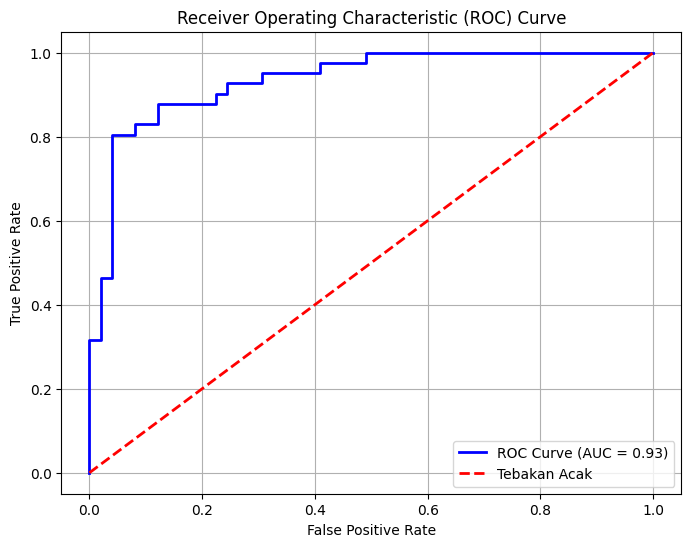

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# --- LANGKAH IV: EVALUASI PERFORMA MODEL ---

# Menghitung berbagai metrik evaluasi dengan membandingkan hasil prediksi (y_pred) dengan jawaban sebenarnya (y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Menampilkan hasil evaluasi
print("--- Hasil Evaluasi Model ---")
print(f"Akurasi (Accuracy): {accuracy:.4f}")
print(f"Presisi (Precision): {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Area Under Curve (AUC): {auc:.4f}")

# --- LANGKAH V: MEMBUAT PLOT ROC CURVE ---

# Menghitung False Positive Rate (FPR) dan True Positive Rate (TPR) untuk membuat kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Membuat plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Menyimpan plot sebagai file gambar
plt.savefig('roc_curve_final.png')

# Menampilkan plot
plt.show()



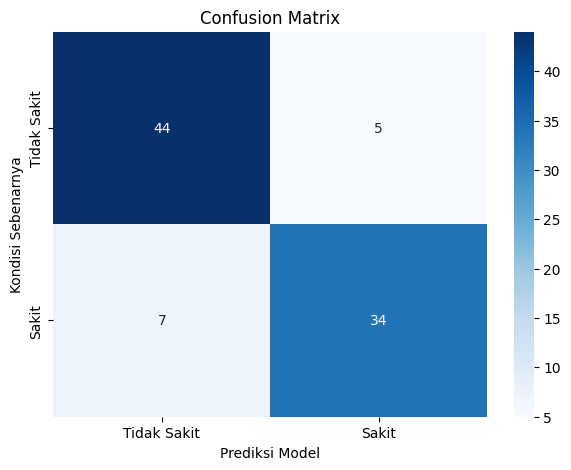


--- Confusion Matrix ---
[[44  5]
 [ 7 34]]
------------------------


In [11]:
# --- LANGKAH TAMBAHAN: MEMBUAT CONFUSION MATRIX ---
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat visualisasi heatmap untuk confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Sakit', 'Sakit'], yticklabels=['Tidak Sakit', 'Sakit'])

# Tambahkan label dan judul
plt.xlabel('Prediksi Model')
plt.ylabel('Kondisi Sebenarnya')
plt.title('Confusion Matrix')

# Simpan gambar
plt.savefig('confusion_matrix.png')

# Tampilkan plot
plt.show()

# Anda juga bisa mencetak matriksnya secara langsung di konsol
print("\n--- Confusion Matrix ---")
print(cm)
print("------------------------")

### Penjelasan Persamaan Matematika

Berikut adalah penjelasan untuk setiap konsep dan persamaan matematika yang digunakan dalam analisis ini.

#### 1\. Regresi Logistik

Regresi Logistik adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari suatu kejadian dengan mencocokkan data pada fungsi logit.

**a. Fungsi Sigmoid (Fungsi Logistik)**
Fungsi sigmoid adalah inti dari regresi logistik. Fungsi ini mengubah output apa pun menjadi nilai antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

  * $\\sigma(z)$ adalah probabilitas hasil.
  * $z$ adalah input ke fungsi, yang merupakan kombinasi linear dari fitur-fitur.
  * $e$ adalah basis dari logaritma natural.

**b. Persamaan Regresi Logistik**
Persamaan regresi logistik memprediksi probabilitas bahwa suatu sampel data termasuk dalam kelas positif (dalam kasus ini, memiliki penyakit jantung).

$$P(y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_nX_n)}}$$

  * $P(y=1 | X)$ adalah probabilitas kelas target adalah 1 (memiliki penyakit jantung) datoberian fitur $X$.
  * $\\beta\_0$ adalah intercept (bias).
  * $\\beta\_1, \\dots, \\beta\_n$ adalah koefisien (bobot) untuk setiap fitur $X\_1, \\dots, X\_n$.

-----

#### 2\. Matriks Evaluasi

Untuk mengevaluasi seberapa baik model klasifikasi kita bekerja, kita menggunakan beberapa metrik. Metrik-metrik ini berasal dari **Confusion Matrix**, yang membandingkan prediksi model dengan nilai aktual.

  * **True Positive (TP)**: Prediksi benar bahwa pasien memiliki penyakit jantung.
  * **True Negative (TN)**: Prediksi benar bahwa pasien tidak memiliki penyakit jantung.
  * **False Positive (FP)**: Prediksi salah, model memprediksi ada penyakit padahal tidak ada (Error Tipe I).
  * **False Negative (FN)**: Prediksi salah, model memprediksi tidak ada penyakit padahal ada (Error Tipe II).

**a. Akurasi (Accuracy)**
Akurasi mengukur seberapa sering model membuat prediksi yang benar. Ini adalah rasio dari prediksi yang benar (TP + TN) terhadap total semua prediksi.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**b. Presisi (Precision)**
Presisi menjawab pertanyaan: "Dari semua pasien yang kita prediksi memiliki penyakit jantung, berapa banyak yang sebenarnya benar?" Ini penting ketika biaya dari *False Positive* tinggi.

$$\text{Precision} = \frac{TP}{TP + FP}$$

**c. Recall (Sensitivity)**
Recall menjawab pertanyaan: "Dari semua pasien yang sebenarnya memiliki penyakit jantung, berapa banyak yang berhasil kita prediksi?" Ini penting ketika biaya dari *False Negative* tinggi.

$$\text{Recall} = \frac{TP}{TP + FN}$$

**d. F1-Score**
F1-Score adalah rata-rata harmonik dari Presisi dan Recall. Metrik ini berguna ketika kita ingin mencari keseimbangan antara Presisi dan Recall.

$$F1\text{-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**e. ROC Curve dan AUC**

  * **ROC (Receiver Operating Characteristic) Curve**: Kurva ROC adalah plot dari **True Positive Rate (Recall)** terhadap **False Positive Rate** pada berbagai ambang batas klasifikasi.

      * **True Positive Rate (TPR)**: Sama dengan Recall.
        $$\text{TPR} = \frac{TP}{TP + FN}$$
      * **False Positive Rate (FPR)**: Rasio dari kasus negatif yang salah diklasifikasikan sebagai positif.
        $$\text{FPR} = \frac{FP}{FP + TN}$$

  * **AUC (Area Under the Curve)**: AUC mengukur seluruh area dua dimensi di bawah kurva ROC. AUC memberikan ukuran agregat dari kinerja di semua ambang batas klasifikasi.

      * **AUC = 1**: Model sempurna.
      * **AUC = 0.5**: Model tidak lebih baik dari tebakan acak.
      * **AUC \< 0.5**: Model lebih buruk dari tebakan acak.

Nilai **AUC sebesar 0.93** menunjukkan bahwa model ini memiliki kemampuan yang sangat baik untuk membedakan antara pasien dengan dan tanpa penyakit jantung.